# **Principal Component Analysis (PCA) auf fiktiven Motorsensor-Daten**

## **Daten laden**

Die im folgenden verwendeten Daten sind fiktive Daten, die aber gut geeignet sind die PCA zu veranschaulichen. Da es fiktive Daten sind werden sie nicht eingelesen sondern hier definiert.

In [111]:
# Benötigte Pakete Laden
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = {
    'Vibration_X': [6.680732, 4.714354, 5.347986, 4.234743, 4.354226,
                    6.366782, 4.370367, 4.957745, 5.548370, 5.555526,
                    5.271683, 4.496047, 4.781982, 6.331591, 5.620623,
                    4.212033, 5.368364, 5.772730, 5.878578, 4.748919],
    'Vibration_Z': [-0.585600, -3.356490, -3.044960, -5.848494, -3.884360,
                    -0.306253, -4.697658, -4.388055, -1.421647, -1.692760,
                    -4.580369, -2.804003, -4.101715, -1.359707, -0.654109,
                    -4.599351, -2.086056, -0.474397, -1.021997, -3.170607],
    'Motorstrom': [10.966611, 9.844014, 10.936838, 12.194214, 9.205213,
                   10.621584, 9.512848, 10.395951, 11.183580, 11.304036,
                   10.668150, 9.635189, 10.324816, 11.529447, 11.310569,
                   9.744037, 10.920004, 11.388050, 11.545134, 10.330930],
    'Temperatur': [2.321896, 0.718526, 0.735628, -0.783610, 0.699375,
                   2.168276, -0.274254, 0.200799, 1.452442, 1.291865,
                   -0.330535, 0.792569, 0.495886, 1.228615, 1.637273,
                   -0.530623, 1.003682, 1.274913, 1.076671, 0.713282]
}

X = pd.DataFrame(data)

X['Temperatur'] = X['Temperatur'] + 90
X['Vibration_X'] = X['Vibration_X'] * 0.08
X['Vibration_Z'] = X['Vibration_Z'] * -0.15


## **Daten explorieren**

Der naheliegende erste Schritt ist, sich die Daten erst einmal auszugeben und anzusehen.

In [112]:
print("Datenform:", X.shape);
print(X);

Datenform: (20, 4)
    Vibration_X  Vibration_Z  Motorstrom  Temperatur
0      0.534459     0.087840   10.966611   92.321896
1      0.377148     0.503474    9.844014   90.718526
2      0.427839     0.456744   10.936838   90.735628
3      0.338779     0.877274   12.194214   89.216390
4      0.348338     0.582654    9.205213   90.699375
5      0.509343     0.045938   10.621584   92.168276
6      0.349629     0.704649    9.512848   89.725746
7      0.396620     0.658208   10.395951   90.200799
8      0.443870     0.213247   11.183580   91.452442
9      0.444442     0.253914   11.304036   91.291865
10     0.421735     0.687055   10.668150   89.669465
11     0.359684     0.420600    9.635189   90.792569
12     0.382559     0.615257   10.324816   90.495886
13     0.506527     0.203956   11.529447   91.228615
14     0.449650     0.098116   11.310569   91.637273
15     0.336963     0.689903    9.744037   89.469377
16     0.429469     0.312908   10.920004   91.003682
17     0.461818     0.07116

Die Daten enthalten 20 Einträge in 4 Dimensionen.

In [113]:
# Erstellen des interaktiven 3D-Plots
fig = px.scatter_3d(X, x='Vibration_X', y='Vibration_Z', z='Motorstrom',
                    color='Temperatur', color_continuous_scale=px.colors.sequential.Viridis)

# Anpassen der Layout-Eigenschaften
fig.update_layout(scene=dict(
    xaxis_title='Vibration_X',
    yaxis_title='Vibration_Z',
    zaxis_title='Motorstrom'),
    title='Interaktiver 3D-Plot mit temperaturkodierter Farbe',
    width=800,
    height=600)

# Anzeigen des Plots
fig.show()

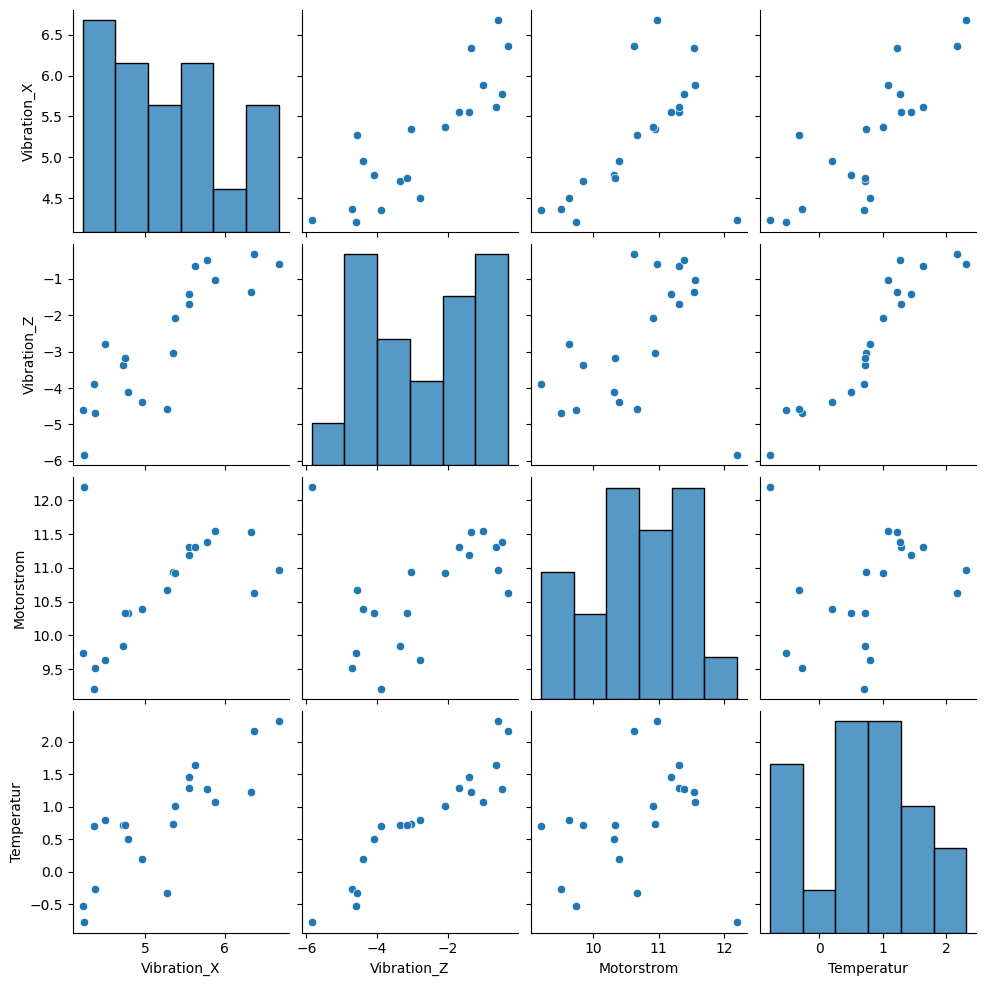

In [114]:
# Pairplot für Zusammenhänge zwischen Variablen
sns.pairplot(df_sensors)
plt.show()

## **Daten zentrieren und standardisieren**


Bevor wir die Hauptkomponentenanalyse durchführen, zentrieren und standardisieren wir die Daten. Dabei werden alle Veriablen so transformiert, dass sie einen Mittelwert von 0 und eine Varianz von 1 haben.

Die Zentrierung ist wichtig für die Aussagekraft der PCA. Ohne Zentrierung würde die erste Hauptkomponente auf die Mitte der Daten zeigen.

Die standardisierung wird gemacht, damit alle Variablen gleich gewichtet in die Analyse eingehen.

In [115]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Datensatz nach Zentrierung und Standardisierung

In [116]:
print(X_scaled);

[[ 1.99521341 -1.27712917  0.37179746  1.87466727]
 [-0.71042344  0.39342521 -1.07467058 -0.09341998]
 [ 0.1614222   0.20560548  0.3334349  -0.0724278 ]
 [-1.37034397  1.89584075  1.9535659  -1.93724562]
 [-1.20594139  0.71167513 -1.89776669 -0.11692724]
 [ 1.56323406 -1.44554595 -0.07277038  1.68610346]
 [-1.18373219  1.20200804 -1.5013785  -1.31202683]
 [-0.37552971  1.01535008 -0.36349887 -0.72891391]
 [ 0.43714047 -0.77308102  0.65136237  0.80743929]
 [ 0.44698676 -0.60962848  0.80657012  0.61033597]
 [ 0.05643312  1.13129514 -0.01277002 -1.38111002]
 [-1.01080285  0.06033382 -1.34374193 -0.00253448]
 [-0.61737073  0.84271727 -0.45515643 -0.36670372]
 [ 1.51481302 -0.81042431  1.09701255  0.53269855]
 [ 0.53655695 -1.23582547  0.8149879   1.03431364]
 [-1.40159178  1.14273928 -1.2034911  -1.62671187]
 [ 0.1894613  -0.37251248  0.31174427  0.25660022]
 [ 0.7458485  -1.34417285  0.91482229  0.58952791]
 [ 0.89149001 -1.01402782  1.11722528  0.34619197]
 [-0.66286375  0.28135736 -0.44

## **Kovarianzmatrix berechnen**

Die Kovarianzmatrix beschreibt die linearen Beziehungen zwischen den einzelnen Variablen. Sie zeigt uns, wie stark zwei Variabeln gemeinsam variieren, also ob sie tendenziell gleichzeitig hohe oder niedrige Werte annehmen.

In der PCA wird die Kovarianzmatrix benötigt, um die Richtungen größter Varianz zu finden.

In [117]:
# Kovarianzmatrix berechnen
cov_matrix = np.cov(X_scaled.T)
print("Kovarianzmatrix-Form:", cov_matrix.shape)

Kovarianzmatrix-Form: (4, 4)


Bei vier Variablen hat die Kovarianzmatrix die Dimension 4×4, wobei die Diagonalelemente die Varianzen der einzelnen Variablen und die Nicht-Diagonalelemente die Kovarianzen zwischen den Variablenpaaren darstellen.

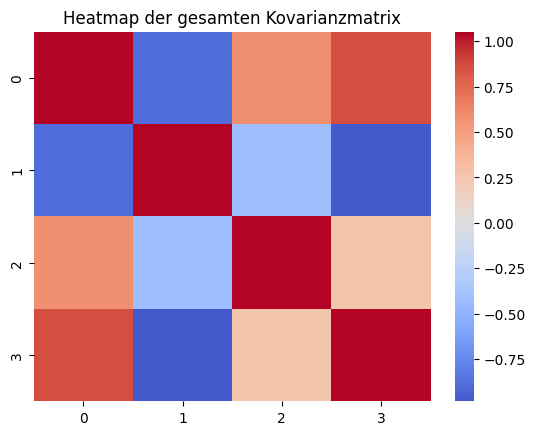

In [118]:
# Kovarianzmatrix plotten
sns.heatmap(cov_matrix, cmap="coolwarm", center=0)
plt.title("Heatmap der gesamten Kovarianzmatrix")
plt.show()

## **Eigenwerte und Eigenvektoren**


Wir berechnen nun die Eigenwerte und Eigenvektoren der Kovarianzmatrix. Die Eigenwerte geben an, wie viel Varianz jeweils durch eine Hauptkomponente erklärt wird. Die Eigenvektoren sind die Richtungen dieser Hauptkomponenten.

Basierend auf der Kovarianzmatrix lassen sich die Eigenwerte und und Eigenvektoren berechnen. Diese helfen dabei, Richtungen mit der größten Varianz in den Daten zu identifizieren.

Die **Eigenvektoren** definieren die Richtungen der neuen Hauptkomponentenachsen im ursprünglichen Merkmalsraum. Jeder Eigenvektor zeigt in die **Richtung der maximalen Varianz** für die entsprechende Hauptkomponente.

Die **Elemente eines Eigenvektors** zeigen an, wie stark jede der ursprünglichen Variablen zu der neuen Hauptkomponente beiträgt. Wenn ein Element eines Eigenvektors groß ist, bedeutet dies, dass die entsprechende ursprüngliche Variable einen starken Einfluss auf diese Hauptkomponente hat.

Die **Eigenwerte** geben die Varianz der Daten entlang der neuen Hauptkomponentenachsen an. Ein großer Eigenwert zeigt an, dass die zugehörige Hauptkomponente eine große Menge an Varianz in den Daten erklärt.

In [119]:
# Eigenwerte und Eigenvektoren berechnen
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

Wir möchten die Eigenvektoren bzw. Hauptkomponenten identifizieren, die den größten Anteil an Varianz in den Daten erklären. Dazu sortieren wir die Eigenwerte nach absteigender größe.

In [120]:
# Eigenwerte absteigend sortieren
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("Eigenwerte:");
print(eigenvalues);
print("Eigenvektoren:");
print(eigenvectors);

Eigenwerte:
[3.13555411 0.87464638 0.14366616 0.05665967]
Eigenvektoren:
[[-0.55054852  0.0567155   0.83122969 -0.05231516]
 [ 0.55371865  0.21645289  0.39601886  0.69979488]
 [-0.33098712  0.89297308 -0.27138577  0.13927084]
 [-0.52984857 -0.39055163 -0.28031417  0.6986801 ]]


### Scree Plot

Ein Scree-Plot zeigt die Eigenwerte in absteigender Reihenfolge. So erkennt man, wie viel Varianz jede Komponente erklärt.

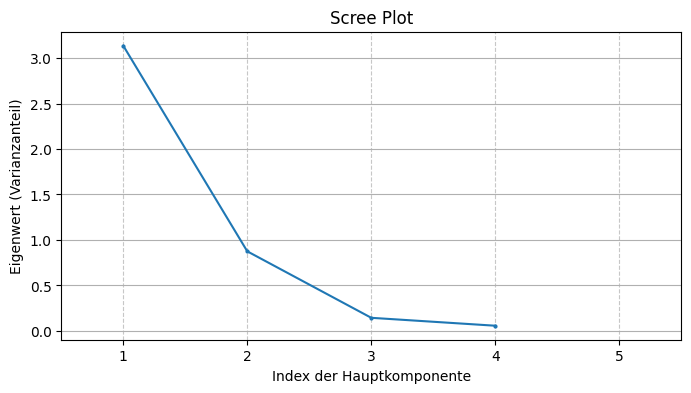

In [121]:
# Schritt 6: Scree-Plot und Auswahl der PCs
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, 5), eigenvalues[:4], 'o-',markersize=2)

# Beschriftungen anpassen
plt.xlabel('Index der Hauptkomponente')
plt.ylabel('Eigenwert (Varianzanteil)')
plt.title('Scree Plot')

# X-Achse konfigurieren
plt.xticks(np.arange(1, 6))  # Nur Ticks bei 1-5
plt.xlim(0.5, 5.5)  # Kleiner Rand links/rechts

# Grid nur bei den X-Ticks
plt.grid(True, axis='y')  # Horizontale Gridlines immer
plt.grid(True, axis='x', which='major', linestyle='--', alpha=0.7)  # Nur bei Haupt-Ticks

plt.show()

## **Auswahl der Hauptkomponenten**

Wenn die Hauptkomponenten bekannt sind, muss entschieden werden, wieviele davon herangezogen werden sollen um die Daten zu beschreiben. In diesem Schritt findet die eigentliche Dimesionsreduktion statt. Dabei muss berücksichtigt werden, dass mit der Dimensionsreduktion auch immer ein Informationsverlust einhergeht.

Ein zuverlässiges Kriterium ist die kumulierte Varianz. Dabei wird geschaut, wieviele Hauptkomponenten benötigt werden um 90% bzw 95% der Varianz in den Daten zu beschreiben.

### Kumulierte Varianz

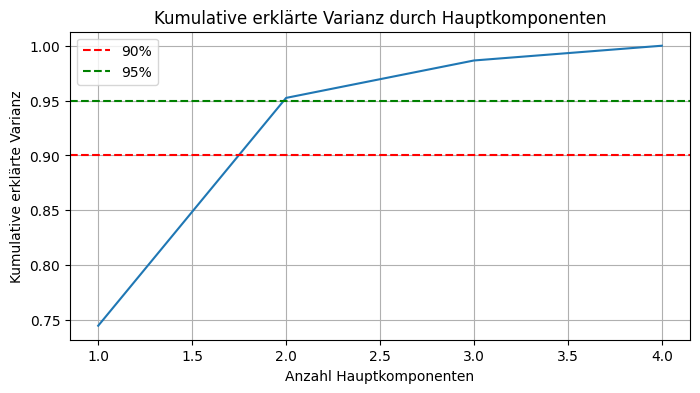

In [122]:
# Kumulierte erklärte Varianz berechnen
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot der kumulierten Varianz
plt.figure(figsize=(8, 4))

plt.plot(np.arange(1, len(cumulative_variance) + 1),
         cumulative_variance,
         linestyle='-',  # Durchgezogene Linie (Standard)
         linewidth=1.5   # Etwas dickere Linie für bessere Sichtbarkeit
)

plt.axhline(y=0.90, color='r', linestyle='--', label='90%')
plt.axhline(y=0.95, color='g', linestyle='--', label='95%')
plt.xlabel('Anzahl Hauptkomponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.title('Kumulative erklärte Varianz durch Hauptkomponenten')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
# Komponentenanzahl für 90 % bzw. 95 % Varianz bestimmen
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Anzahl Komponenten für 90% erklärte Varianz: {n_90}")
print(f"Anzahl Komponenten für 95% erklärte Varianz: {n_95}")

Anzahl Komponenten für 90% erklärte Varianz: 2
Anzahl Komponenten für 95% erklärte Varianz: 2


## **Projektion der Daten**


Die standardisierten Daten werden nun auf die gewählten Hauptkomponenten projiziert. Dadurch erhalten wir eine Darstellung der Daten in einem neuen Merkmalsraum mit reduzierter Dimensionalität. Mathematisch wird dies durch Matrixmultiplikation mit den ausgewählten Eigenvektoren umgesetzt.

In [124]:
num_components = n_95; # n_90 bei 90% erklaerter Varianz

X_pca = X_scaled.dot(eigenvectors[:, :num_components])
print("Projizierte Datenform:", X_pca.shape)

print("Projizierte Daten:");
print(X_pca);

Projizierte Datenform: (20, 2)
Projizierte Daten:
[[-2.92198199 -0.563428  ]
 [ 1.01417001 -0.87830057]
 [-0.04701006  0.37969423]
 [ 2.1840449   2.83371665]
 [ 1.74808711 -1.56333988]
 [-2.5303554  -0.94772544]
 [ 2.50938876 -0.63523422]
 [ 1.27549304  0.15856092]
 [-1.31214953  0.12375935]
 [-1.17400052  0.37527293]
 [ 1.33135592  0.77606422]
 [ 1.03600814 -1.24320428]
 [ 1.15146917 -0.11583161]
 [-1.92807172  0.68205109]
 [-1.79748035  0.08674248]
 [ 2.66465135 -0.27151295]
 [-0.54971735  0.10827759]
 [-1.77007429  0.33802167]
 [-1.60551112  0.69351831]
 [ 0.72168391 -0.33710248]]


## **Visualisierung der projizierten Daten**

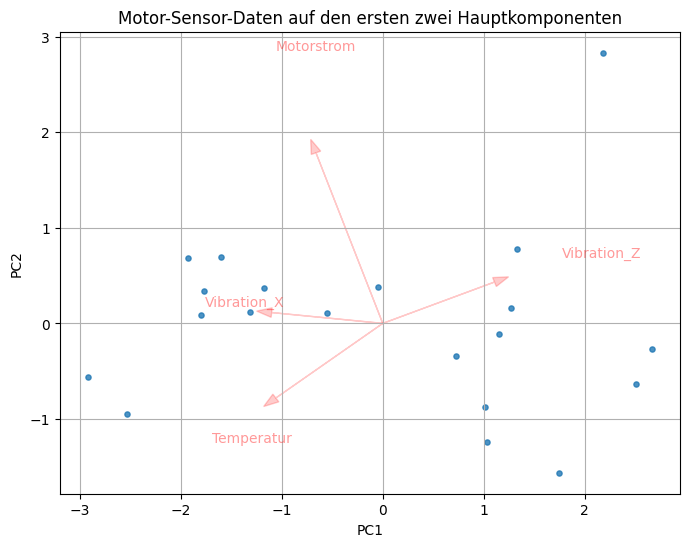

In [125]:
# Visualisierung der ersten beiden PCs
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, s=14)

# Loadings-Pfeile
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, eigenvectors[i, 0]*2, eigenvectors[i, 1]*2,
              color='red', alpha=0.2, head_width=0.1)
    plt.text(eigenvectors[i, 0]*3.2, eigenvectors[i, 1]*3.2, var,
             fontsize=10, color='red', alpha=0.4)


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Motor-Sensor-Daten auf den ersten zwei Hauptkomponenten")

plt.grid(True)
plt.show()

## **Rekonstruktion der Daten aus den projizierten Daten**

In [126]:
W = eigenvectors[:, :num_components]

# Rückprojektion
X_reconstructed = X_pca @ W.T  # Shape: (n_samples, n_features)

print("Rückprojektion der Daten:")
print(X_reconstructed);

# zum Vergleich die zentrierten und standardisierten urspruenglichen Daten
print("Urspruengliche Daten:");
print(X_scaled);

# Der entstanden Fehler zwischen den beiden Datensaetzen:
print("Fehler:");
print(X_reconstructed - X_scaled);

Rückprojektion der Daten:
[[ 1.57673777 -1.73991154  0.46401236  1.7682557 ]
 [-0.60816306  0.37145416 -1.11997598 -0.19433481]
 [ 0.04741587  0.05615557  0.35461645 -0.12338199]
 [-1.04170703  1.82271255  1.80754196 -2.26392572]
 [-1.05107238  0.629559   -1.97461475 -0.31565651]
 [ 1.33933271 -1.60624289 -0.00877826  1.7108409 ]
 [-1.41756791  1.25199707 -1.39782242 -1.08150428]
 [-0.69322795  0.74058526 -0.28058114 -0.73774439]
 [ 0.72942106 -0.6997736   0.54481836  0.64690613]
 [ 0.66762805 -0.56883708  0.72368767  0.47547904]
 [-0.68896117  0.90517795  0.2523428  -1.00851018]
 [-0.64088171  0.30456187 -1.45305331 -0.06339197]
 [-0.6405091   0.61251787 -0.48455597 -0.56486607]
 [ 1.10017991 -0.91997734  1.24722017  0.75520987]
 [ 0.9945198  -0.97652273  0.67240154  0.91851497]
 [-1.48241886  1.41669739 -1.12441903 -1.30582188]
 [ 0.30878709 -0.28095175  0.27863834  0.24897896]
 [ 0.99368285 -0.90695738  0.88771604  0.80585641]
 [ 0.92324501 -0.73888741  1.15069668  0.57982306]
 [-0.